<a href="https://colab.research.google.com/github/vishalonline23/Vishal-PIT-tasks/blob/main/task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tensorflow as tf
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (25, 6)
mpl.rcParams['axes.grid'] = False

In [ ]:
import numpy as np
import PIL.Image
import requests
from io import BytesIO


In [ ]:
def tensor_to_image(tensor):
    tensor = tensor * 255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor) > 3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

# Function to load image from URL
def load_img_from_url(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for HTTP errors
        img = PIL.Image.open(BytesIO(response.content)).convert('RGB')  # Ensure the image is in RGB format
    except requests.exceptions.RequestException as e:
        print(f"Error downloading image: {e}")
        return None
    except PIL.UnidentifiedImageError:
        print(f"Error opening image from URL: {url}")
        return None

    max_dim = 512
    long_dim = max(img.size)
    scale = max_dim / long_dim

    new_size = (int(img.size[0] * scale), int(img.size[1] * scale))
    img = img.resize(new_size, PIL.Image.ANTIALIAS)

    img = np.array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0
    return tf.convert_to_tensor(img, dtype=tf.float32)

# Function to display image
def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)

    plt.imshow(image)
    if title:
        plt.title(title)

In [ ]:
content_url = 'https://media3.s-nbcnews.com/i/newscms/2020_04/3203206/200126-kobe-bryant-cs-551p_94a33c06ae6c4bbebaf59985de472c42.jpg'
style_url = 'https://c8.alamy.com/comp/DR9R5N/indian-mural-painting-of-indian-god-krishna-and-radha-in-a-romantic-DR9R5N.jpg'
# Load images from URLs
content_image = load_img_from_url(content_url)
style_image = load_img_from_url(style_url)

<ipython-input-3-eddbc792fca5>:27: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(new_size, PIL.Image.ANTIALIAS)


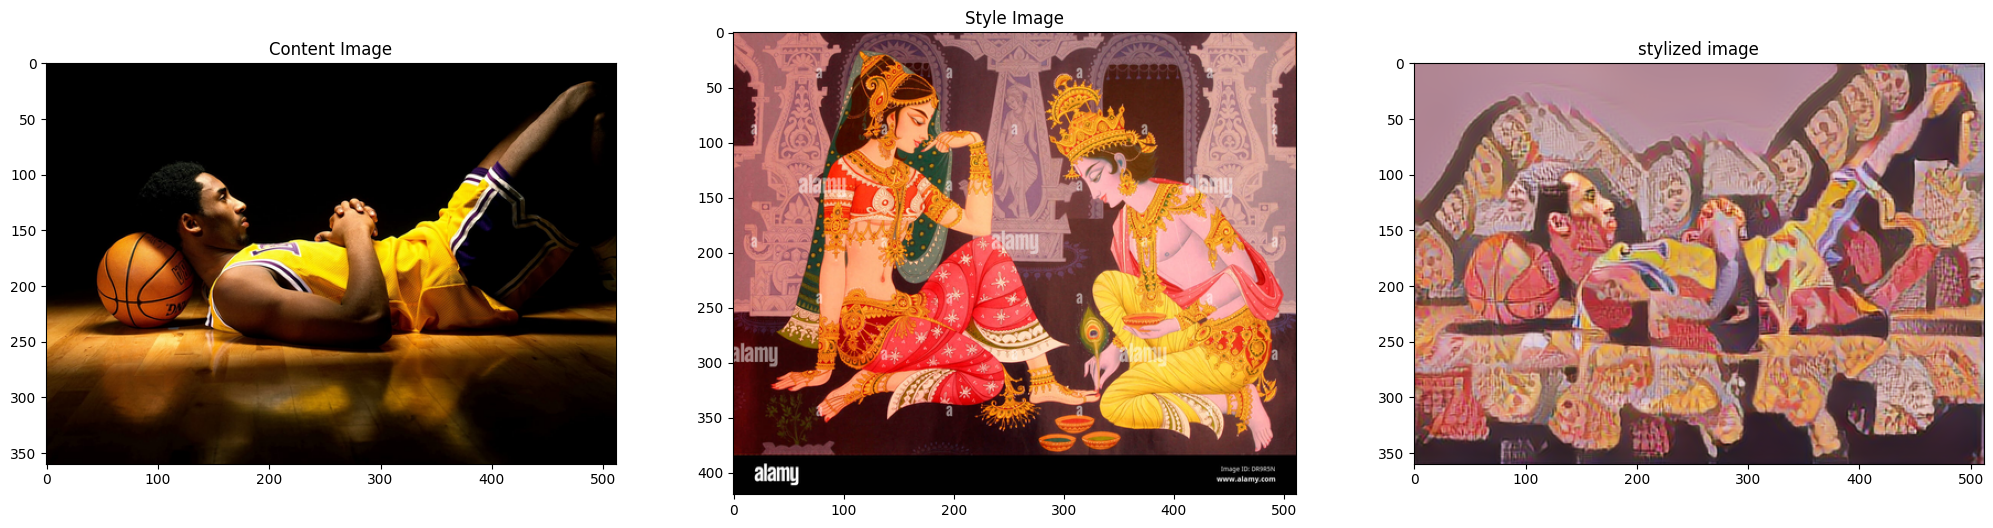

In [ ]:
if content_image is not None and style_image is not None:
    plt.subplot(1, 3, 1)
    imshow(content_image, 'Content Image')

    plt.subplot(1, 3, 2)
    imshow(style_image, 'Style Image')

    import tensorflow_hub as hub
    hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
    stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

    result_image = tensor_to_image(stylized_image)
    result_image.show()
    plt.subplot(1,3,3)
    imshow(stylized_image,'stylized image')
else:
    print("One or both images could not be loaded. Please check the URLs and try again.")